## Python Code

### Import the data

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from pandas.tseries.offsets import Day

In [2]:
data = pd.read_csv('O2O_Data_Analyst_Sample_Data.csv')
data

,date,user_id,order_id,sales
0,2018/3/23,A,1003,100
1,2018/3/24,B,1045,60
2,2018/3/25,C,1046,50
3,2018/3/26,D,1047,40
4,2018/3/27,E,1048,55
5,2018/3/28,A,1049,100
6,2018/3/29,B,1050,60
7,2018/3/30,C,1051,50
8,2018/3/31,E,1052,40
9,2018/4/1,A,1053,55


### Simple explore

Everyday every counsumer spend how much money.

From the plot, we could see that every time user A will spend $100, the biggest value in here.

So, user A is our vip consumer.

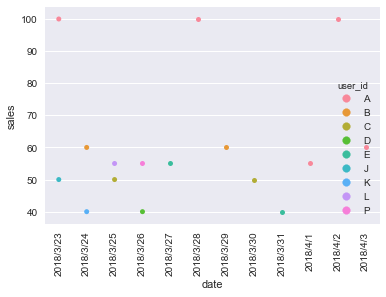

In [3]:
sns.stripplot(x = 'date', y ='sales', hue = 'user_id', data = data);
plt.xticks(rotation=90);

If there are lots of data, scatter plot will be messed.

we could summary the sales by every day.

In [4]:
data2 = pd.pivot_table(data, index = ['date'], values ='sales', aggfunc = np.sum).reset_index()
data2

,date,sales
0,2018/3/23,150
1,2018/3/24,100
2,2018/3/25,105
3,2018/3/26,95
4,2018/3/27,55
5,2018/3/28,100
6,2018/3/29,60
7,2018/3/30,50
8,2018/3/31,40
9,2018/4/1,55


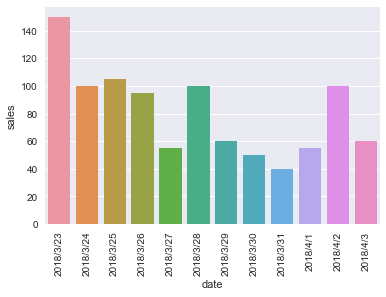

In [5]:
sns.barplot(x = 'date', y ='sales', data = data2);
plt.xticks(rotation=90);

Sometimes, we could also compute the sales by per person and per day.

In [6]:
data3 = pd.pivot_table(data, index = ['date'], values ='sales', aggfunc = np.mean).reset_index()
data3

,date,sales
0,2018/3/23,75.0
1,2018/3/24,50.0
2,2018/3/25,52.5
3,2018/3/26,47.5
4,2018/3/27,55.0
5,2018/3/28,100.0
6,2018/3/29,60.0
7,2018/3/30,50.0
8,2018/3/31,40.0
9,2018/4/1,55.0


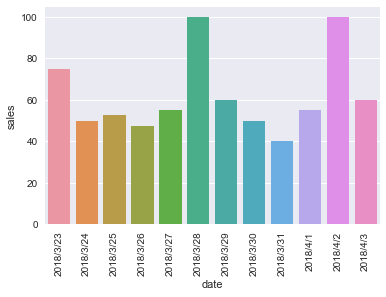

In [7]:
sns.barplot(x = 'date', y ='sales', data = data3);
plt.xticks(rotation=90);

Using boxplot to compare sales by every day.

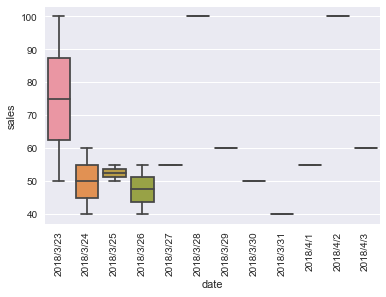

In [8]:
sns.boxplot(x = "date", y = "sales", data = data);
plt.xticks(rotation=90);

Because the item in every day is less, so we use month as a unit.

Using boxplot to compare sales by every month.

In [9]:
data['date'] = pd.to_datetime(data['date'])
data['month'] = data['date'].apply(lambda x: x.month)
data

,date,user_id,order_id,sales,month
0,2018-03-23,A,1003,100,3
1,2018-03-24,B,1045,60,3
2,2018-03-25,C,1046,50,3
3,2018-03-26,D,1047,40,3
4,2018-03-27,E,1048,55,3
5,2018-03-28,A,1049,100,3
6,2018-03-29,B,1050,60,3
7,2018-03-30,C,1051,50,3
8,2018-03-31,E,1052,40,3
9,2018-04-01,A,1053,55,4


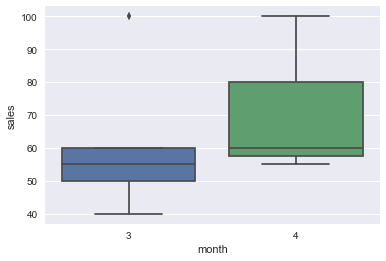

In [10]:
sns.boxplot(x = "month", y = "sales", data = data);

Using violin plot (density estimate) to compare sales by every month.

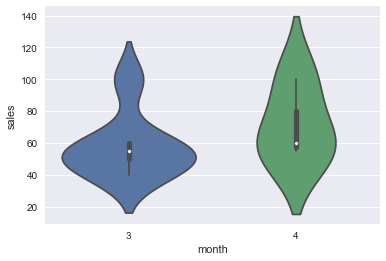

In [11]:
sns.violinplot(x = "month", y = "sales", data = data);

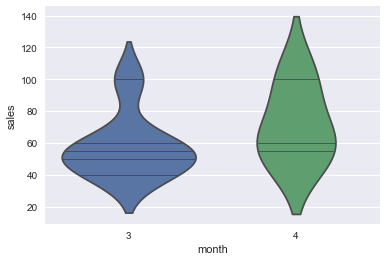

In [12]:
sns.violinplot(x = "month", y = "sales", inner = "stick", data = data);

### Join operation

In [13]:
person = pd.read_csv('person_data.csv')
person

,user_id,gender,age
0,A,F,28
1,B,M,24
2,C,M,36
3,D,M,45
4,E,F,37
5,J,F,50
6,K,F,40
7,L,F,47
8,P,M,67


In [14]:
order = pd.read_csv('order_data.csv')
order

,order_id,product1,product2,product3
0,1003,Y,Y,N
1,1045,N,N,Y
2,1046,Y,N,N
3,1047,N,N,Y
4,1048,Y,Y,N
5,1049,N,N,Y
6,1050,Y,N,N
7,1051,N,N,Y
8,1052,Y,Y,N
9,1053,N,N,Y


In [15]:
data.merge(person, how = 'left', on = 'user_id').merge(order, on = 'order_id')

,date,user_id,order_id,sales,month,gender,age,product1,product2,product3
0,2018-03-23,A,1003,100,3,F,28,Y,Y,N
1,2018-03-24,B,1045,60,3,M,24,N,N,Y
2,2018-03-25,C,1046,50,3,M,36,Y,N,N
3,2018-03-26,D,1047,40,3,M,45,N,N,Y
4,2018-03-27,E,1048,55,3,F,37,Y,Y,N
5,2018-03-28,A,1049,100,3,F,28,N,N,Y
6,2018-03-29,B,1050,60,3,M,24,Y,N,N
7,2018-03-30,C,1051,50,3,M,36,N,N,Y
8,2018-03-31,E,1052,40,3,F,37,Y,Y,N
9,2018-04-01,A,1053,55,4,F,28,N,N,Y


### Date operation

In [16]:
data['weekday'] = data['date'].apply(lambda x: x.weekday_name)
data

,date,user_id,order_id,sales,month,weekday
0,2018-03-23,A,1003,100,3,Friday
1,2018-03-24,B,1045,60,3,Saturday
2,2018-03-25,C,1046,50,3,Sunday
3,2018-03-26,D,1047,40,3,Monday
4,2018-03-27,E,1048,55,3,Tuesday
5,2018-03-28,A,1049,100,3,Wednesday
6,2018-03-29,B,1050,60,3,Thursday
7,2018-03-30,C,1051,50,3,Friday
8,2018-03-31,E,1052,40,3,Saturday
9,2018-04-01,A,1053,55,4,Sunday


In [17]:
pd.to_datetime('2018/3/31') - 89*Day()

Timestamp('2018-01-01 00:00:00')

In [18]:
data.sort_values(by = 'date')

,date,user_id,order_id,sales,month,weekday
0,2018-03-23,A,1003,100,3,Friday
12,2018-03-23,J,1056,50,3,Friday
1,2018-03-24,B,1045,60,3,Saturday
13,2018-03-24,K,1057,40,3,Saturday
2,2018-03-25,C,1046,50,3,Sunday
14,2018-03-25,L,1058,55,3,Sunday
3,2018-03-26,D,1047,40,3,Monday
15,2018-03-26,P,1059,55,3,Monday
4,2018-03-27,E,1048,55,3,Tuesday
5,2018-03-28,A,1049,100,3,Wednesday


Compute the numbers of consumer from 2018-03-26 to 2018-03-31.

There are two numbers, one is the count of the user, the other is the count of the unique of the user.

In [19]:
data[(data.date > '2018/3/25') & (data.date < '2018/4/1')]

,date,user_id,order_id,sales,month,weekday
3,2018-03-26,D,1047,40,3,Monday
4,2018-03-27,E,1048,55,3,Tuesday
5,2018-03-28,A,1049,100,3,Wednesday
6,2018-03-29,B,1050,60,3,Thursday
7,2018-03-30,C,1051,50,3,Friday
8,2018-03-31,E,1052,40,3,Saturday
15,2018-03-26,P,1059,55,3,Monday


In [20]:
data[(data.date > '2018/3/25') & (data.date < '2018/4/1')]['user_id'].count()

7

In [21]:
data[(data.date > '2018/3/25') & (data.date < '2018/4/1')]['user_id'].unique().shape[0]

6L